# Assignment - People's Email Domains Pie Chart

### Authored by: Stephen Kerr


## Overview

### Purpose of this Notebook

This notebook analyses the distribution of email domains from a dataset of 1000 people. The primary goal is to visualise which email domains are commonly used in the dataset. We visualise the data in a pie chart, after the column ''Domain'' was created by taking the 'Email' columns inputs and extracting after the '@' sign. 

### Results of the Analysis

The analysis identified that the distribution of Domains is the following: 
1. 'example.org' (n = 341, 34.10%),
2. 'example.com' (n = 339, 33.90%),
3. 'example.net' (n = 320, 32%),

In that order but not much separates them in terms of percentage with just over 2.1% or 21 emails separating the most common 'example.org' and the least common 'example.net'. 
Note, there was no NaN Values for emails. 

### Conclusion

The Analysis highlights that the email domains used are fairly balanced in distribution with no one domain dominating.

In [1]:
# import pandas for data manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt


In [2]:
# import the data as a Dataframe

df = pd.read_csv('https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1000 non-null   int64 
 1   User Id        1000 non-null   object
 2   First Name     1000 non-null   object
 3   Last Name      1000 non-null   object
 4   Sex            1000 non-null   object
 5   Email          1000 non-null   object
 6   Phone          1000 non-null   object
 7   Date of birth  1000 non-null   object
 8   Job Title      1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [4]:
# Checking there are no missing values for the email column
print(f"Number of Emails missing: {df['Email'].isnull().sum()}")

# Checking there are no blanks for the email column
print(f"Number of Emails blank: {df[df['Email'] == ''].shape[0]}")

# Checking there are no emails without an @ symbol
print(f"Number of Emails without '@': {df[~df['Email'].str.contains('@')].shape[0]}")


Number of Emails missing: 0
Number of Emails blank: 0
Number of Emails without '@': 0


In [5]:
# adding the domain column by extracting from the email column
df['Domain'] = df['Email'].str.split('@').str[1]

In [6]:
# Showing the different email domains and their counts
domain_counts = df['Domain'].value_counts()
for domain, count in domain_counts.items():
    print(f"{domain} : {count}, {(count/len(df))*100:.2f}%")

example.org : 341, 34.10%
example.com : 339, 33.90%
example.net : 320, 32.00%


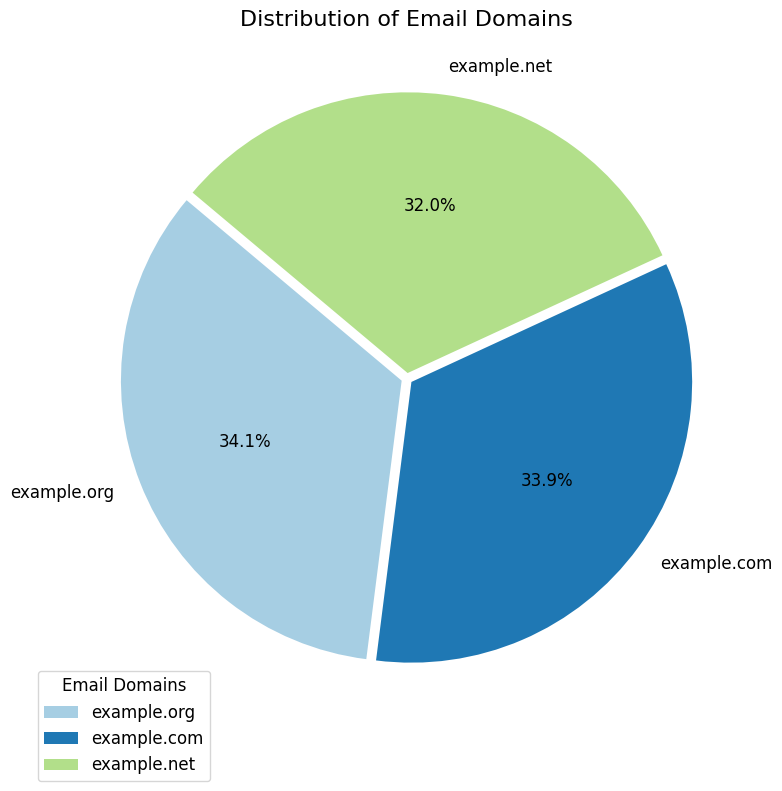

In [ ]:
# create a pie chart of the distribution of email domains

# adding a colur palette - See options here - https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative
colors = plt.cm.Paired.colors

# adding the explode slices (gap between the slices)
explode = [0.02,0.02,0.02]

plt.figure(figsize=(8, 8))
plt.pie(domain_counts, labels=domain_counts.index, 
        autopct='%1.1f%%', startangle=140, 
        colors=colors, explode=explode)
plt.title('Distribution of Email Domains', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Email Domains', bbox_to_anchor=(.05, -0.1), 
           loc='lower center', fontsize=12)
plt.tight_layout()
plt.show()

In [8]:
# Summary statistics on the domain data
print(df['Domain'].describe())

count            1000
unique              3
top       example.org
freq              341
Name: Domain, dtype: object


# End